In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the product file
dataset = pd.read_csv('prods.csv')

In [3]:
dataset.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [4]:
#Cleaning Text using Regex
import re
def preprocess(text):
    #Convert the text to lower case
    text = text.lower()
    #Remove all the digits & Special Characters
    text = re.sub("(\d|\W)+"," ",text)
    return text

In [5]:
#Applying Regex to remove digits & special characters
dataset['product_name'] = dataset['product_name'].apply(lambda x:preprocess(x))
dataset.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [6]:
dataset.shape

(1000, 4)

In [7]:
#Converting data to list, before feeding it to tfidfvectorizer
data = dataset['product_name'].tolist()

In [8]:
#Importing feature extracter library
from sklearn.feature_extraction import text
#unigram & bigram selected, stop_words removed
tf = text.TfidfVectorizer(data,ngram_range=(1,2),stop_words = 'english')
matrix_tfidf = tf.fit_transform(data)

In [9]:
# Sneaking on prepared dataset
pd.DataFrame(matrix_tfidf.toarray(),columns=tf.get_feature_names()).head(3)

,absorbency,absorbency regular,acai,acai blueberry,acai dragonfruit,acai kefir,acai organic,acaí,acaí cultured,acne,...,zesty,zesty spaghetti,zfruit,zfruit veggie,zipper,zipper bags,zita,zita cut,ziti,ziti marinara
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Dimensionality Reduction Using SVD
import sklearn.decomposition as decom
svd = decom.TruncatedSVD(n_components=1000)
matrix_red_svd = svd.fit_transform(matrix_tfidf)

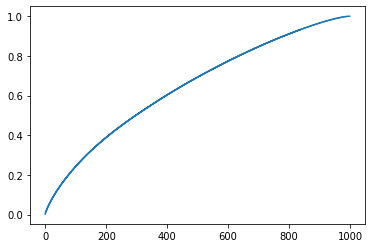

In [19]:
exp_var_cum=np.cumsum(svd.explained_variance_ratio_)
plt.step(range(exp_var_cum.size), exp_var_cum)

In [20]:
# Checking on SVD components
svd.components_

array([[ 2.14842480e-04,  2.14842480e-04,  2.17865679e-02, ...,
         2.81119141e-04,  2.85671486e-03,  2.85671486e-03],
       [ 3.69547245e-04,  3.69547245e-04, -9.51760046e-03, ...,
         6.01963528e-06, -1.61071577e-03, -1.61071577e-03],
       [-2.33361045e-05, -2.33361045e-05, -6.54242600e-03, ...,
         3.14359689e-04,  2.04961832e-02,  2.04961832e-02],
       ...,
       [-7.92165836e-02, -1.95212300e-01, -1.97770863e-01, ...,
         4.24234605e-04,  5.48351756e-03,  7.00157115e-03],
       [ 9.30632507e-03,  1.16478363e-01,  1.27606053e-01, ...,
         7.96513134e-04, -1.89241209e-03, -2.68161803e-03],
       [-9.64688040e-02, -2.07719131e-01, -5.93469215e-02, ...,
        -7.95793894e-03, -4.45306125e-03, -4.19618830e-03]])

In [21]:
# Checking reduced svd matrix
matrix_red_svd.shape

(1000, 1000)

In [22]:
#Importing cosine metrics library
from sklearn.metrics.pairwise import cosine_similarity
sim_unibigram = cosine_similarity(matrix_red_svd)

In [23]:
sim_unibigram[:5]

array([[ 1.00000000e+00, -2.72507440e-16,  7.29125961e-17, ...,
         4.00612703e-17,  1.71412363e-16,  2.84209931e-17],
       [-2.72507440e-16,  1.00000000e+00,  1.16619496e-17, ...,
         1.70795723e-16,  2.36505151e-16, -3.83460493e-17],
       [ 7.29125961e-17,  1.16619496e-17,  1.00000000e+00, ...,
        -5.91838861e-17, -2.84060969e-17,  2.34007991e-17],
       [ 3.70526092e-17, -3.68865908e-17,  5.00223777e-17, ...,
         2.24755110e-16,  4.04949110e-02, -2.49687874e-16],
       [-6.23238372e-17,  1.37883411e-16, -1.79208455e-16, ...,
         9.24857849e-02,  6.47865508e-02,  1.14739232e-16]])

In [21]:
sim_unibigram[0].argsort

<function ndarray.argsort>

In [22]:
sim_unibigram[0].argsort()[-5:-1]

array([590, 575, 171, 558], dtype=int64)

In [23]:
dataset['product_name'].loc[sim_unibigram[0].argsort()[-5:-1]]

590    oreo cookies and cream chocolate frozen dairy ...
575                                vanilla sugar cookies
171       gluten free all natural chocolate chip cookies
558    cookie chips crunchy dark chocolate chocolate ...
Name: product_name, dtype: object

In [24]:
list(dataset['department_id'].loc[sim_unibigram[0].argsort()[-5:-1]])

[1, 19, 19, 19]

In [25]:
# Defining different functions to create a list of recommended products based on cosine similarity matrix
def get_similar_products(x):
    return ",".join(dataset['product_name'].loc[x.argsort()[-5:-1]])
def get_similar_product_aisle(x):
    return list(dataset['aisle_id'].loc[x.argsort()[-5:-1]])
def get_similar_product_dept(x):
    return list(dataset['department_id'].loc[x.argsort()[-5:-1]])
def get_similar_product_id(x):
    return list(dataset['product_id'].loc[x.argsort()[-5:-1]])

In [26]:
#Applying function to create a final table
dataset['suggested_products'] = [get_similar_products(x) for x in sim_unibigram]
dataset['suggested_pro_aisle_id'] = [get_similar_product_aisle(x) for x in sim_unibigram]
dataset['suggested_prod_dept'] = [get_similar_product_dept(x) for x in sim_unibigram]
dataset['suggested_prod_id'] = [get_similar_product_id(x) for x in sim_unibigram]

In [27]:
dataset.head()

,product_id,product_name,aisle_id,department_id,suggested_products,suggested_pro_aisle_id,suggested_prod_dept,suggested_prod_id
0,1,chocolate sandwich cookies,61,19,oreo cookies and cream chocolate frozen dairy ...,"[37, 61, 61, 61]","[1, 19, 19, 19]","[591, 576, 172, 559]"
1,2,all seasons salt,104,13,"thin stackers brown rice salt free,sardines in...","[107, 33, 104, 104]","[19, 6, 13, 13]","[273, 425, 463, 240]"
2,3,robust golden unsweetened oolong tea,94,7,almond breeze unsweetened almond coconut milk ...,"[91, 91, 94, 61]","[16, 16, 7, 19]","[738, 862, 560, 569]"
3,4,smart ones classic favorites mini rigatoni wit...,38,1,"mini double chocolate ice cream bars,classic c...","[37, 77, 37, 131]","[1, 7, 1, 9]","[997, 649, 431, 774]"
4,5,green chile anytime sauce,5,13,"petite green peas,apple green cups,caramel sau...","[116, 111, 103, 107]","[1, 17, 19, 19]","[969, 846, 275, 851]"


In [28]:
dataset.to_csv('Final_data.csv')